# Домашнее задание 1
## Harry Potter and the Action Prediction Challenge from Natural Language
# Embeddings  [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Danyago98/NLP-HW/blob/master/HomeWork1.ipynb)
deadline: 2 октября 2019, 23:59

В этом домашнем задании вы будете работать с корпусом Harry Potter and the Action Prediction Challenge. Корпус собран из фанфиков о Гарри Поттере и состоит из двух частей: 1) сырые тексты, 2) фрагменты текстов, описывающих ситуацию, в которой произнесено заклинание.

Корпус описан в статье: https://arxiv.org/pdf/1905.11037.pdf

David Vilares and Carlos Gómez-Rodríguez. Harry Potter and the Action Prediction Challenge from Natural Language. 2019 Annual Conference of the North American Chapter of the Association for Computational Linguistics. To appear.

Код для сбора корпуса находится в репозитории: https://github.com/aghie/hpac . Корпус можно скачать по инструкции из этого репозитория, но для экономии времени авторы задания уже скачали и подготовили данные к работе. 

Ссылки на собранный корпус: 
* Сырые тексты: https://www.dropbox.com/s/gwfgmomdbetvdye/hpac_source.zip?dl=0
* train-test-dev: https://www.dropbox.com/s/3vdz0mouvex8abd/hpac_splits.zip?dl=0

В статье и репозитории вы найдете идеи, которые помогут вам выполнить домашнее задание. Их стоит воспринимать как руководство к действию, и не стоит их копировать и переиспользовать. Обученные модели использовать не нужно, код для их обучения можно использовать как подсказку. 

## ПРАВИЛА
1. Домашнее задание выполняется в группе до 3-х человек.
2. Домашнее задание сдается через anytask, инвайты будут дополнительно высланы.
3. Домашнее задание оформляется в виде отчета либо в .pdf файле, либо ipython-тетрадке. 
4. Отчет должен содержать: нумерацию заданий и пунктов, которые вы выполнили, код решения, и понятное пошаговое описание того, что вы сделали. Отчет должен быть написан в академическом стиле, без излишнего использования сленга и с соблюдением норм русского языка.
5. Не стоит копировать фрагменты лекций, статей и Википедии в ваш отчет.
6. Отчеты, состоящие исключительно из кода, не будут проверены и будут автоматически оценены 0.
7. Плагиат и любое недобросоветсное цитирование приводит к обнуление оценки. 

In [1]:
import os

def download_corpus():
    os.system('wget -O hpac_source.zip https://www.dropbox.com/s/gwfgmomdbetvdye/hpac_source.zip?dl=1')
    os.system('wget -O hpac_splits.zip https://www.dropbox.com/s/3vdz0mouvex8abd/hpac_splits.zip?dl=1')
    os.system('unzip hpac_source.zip')
    os.system('unzip hpac_splits.zip')
    
download = False
if download:
    download_corpus()

In [2]:
os.listdir('hpac_corpus/')

['hpac_training_128.tsv', 'hpac_dev_128.tsv', 'hpac_test_128.tsv']

In [3]:
os.listdir('hpac_source/')[:10]

['4472122',
 '5214134',
 '5287826',
 '11996224',
 '7887747',
 '12680061',
 '10780513',
 '4457057',
 '2849042',
 '9768115']

In [4]:
with open('./hpac_source/3120338', 'r') as f:
    x = f.readline()
x

"disclaimer : i own nothing over i watch the walls around me crumble but it 's not like i wo n't build them again so here 's your last chance for redemption so take it while it last 's cause it will end my tears are turning into time i 've wasted trying to find a reason for goodbye harry watched as draco 's perfected curtains of non-existant expression gave way , but only for a second . `` draco , i was there , i watched what happened ! i know that you would n't have killed him given the chance . i saw you hesitate . dumbledore was going to help you ! and now if you will just let me i will be the one to help . please ... all you have to do is ask , the auror 's outside will be called off , and things will go back to the way things were . '' harry stepped forward to caress draco 's bruised cheek and wiped away the one solitary tear that had escaped draco 's cool façade . `` you can trust me ... '' draco stepped back out of his touch , eyes cold and glaring at harry 's offending hand . `

## Часть 1. [2 балла] Эксплоративный анализ 
1. Найдите топ-1000 слов по частоте без учета стоп-слов.
2. Найдите топ-10 имен (имя + фамилия) по частоте. 
[бонус] Постройте тематическую модель по корпусу HPAC.
[бонус] Найдите еще что-то интересное в корпусе (что-то специфичное для фанфиков или фентези-тематики)

In [ ]:
import spacy

In [23]:
from nltk.corpus import stopwords
from string import punctuation
from tqdm import tqdm_notebook as tqdm
from collections import Counter
from copy import deepcopy
import re
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alyonkim/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [24]:
punct = re.compile(f'[{punctuation}]')
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def preprocessing(text):
    text = re.sub(punct, '', text)
    text = [lemmatizer.lemmatize(token) for token in text.split() if token not in stop_words]
    return [token for token in text if token]

In [28]:
def document_preproc(filename):
    with open(f"./hpac_source/{filename}", 'r') as f:
        x = f.readline()
    return preprocessing(x)

In [32]:
from multiprocessing import Pool
files = os.listdir('./hpac_source/')
with Pool(4) as p:
    data = list(tqdm(p.imap(document_preproc, files, chunksize=62), total=len(files), desc='preproc'))

In [34]:
with Pool(4) as p:
    counters = list(tqdm(p.imap(Counter, data, chunksize=62), total=len(data), desc='counters'))

In [35]:
c = Counter()
for counter in tqdm(counters):
    c += counter

In [36]:
c.most_common(1000)

[('nt', 4396934),
 ('harry', 3991109),
 ('said', 2262080),
 ('would', 1903186),
 ('hermione', 1826931),
 ('could', 1687865),
 ('one', 1441896),
 ('back', 1402759),
 ('draco', 1386744),
 ('like', 1275430),
 ('know', 1258868),
 ('eye', 1139985),
 ('time', 1133030),
 ('hand', 956998),
 ('ron', 904542),
 ('looked', 893362),
 ('get', 882518),
 ('asked', 826351),
 ('well', 784432),
 ('even', 769963),
 ('around', 767193),
 ('head', 765487),
 ('see', 757366),
 ('think', 747961),
 ('going', 718588),
 ('go', 698919),
 ('thought', 697293),
 ('still', 692207),
 ('face', 691341),
 ('way', 688463),
 ('room', 681036),
 ('want', 667913),
 ('look', 664507),
 ('severus', 654539),
 ('ginny', 637932),
 ('sirius', 628713),
 ('something', 622351),
 ('potter', 618288),
 ('thing', 615286),
 ('right', 610338),
 ('snape', 597681),
 ('away', 579743),
 ('much', 577288),
 ('year', 572927),
 ('two', 562828),
 ('never', 557611),
 ('really', 525858),
 ('wand', 525796),
 ('let', 525750),
 ('knew', 524580),
 ('first', 

## Часть 2. [2 балла] Модели представления слов 
Обучите модель представления слов (word2vec, GloVe, fastText или любую другую) на материале корпуса HPAC.
1. Продемонстрируйте, как работает поиск синонимов, ассоциаций, лишних слов в обученной модели. 
2. Визуализируйте топ-1000 слов по частоте без учета стоп-слов (п. 1.1) с помощью TSNE или UMAP (https://umap-learn.readthedocs.io).

In [37]:
from gensim.models import FastText

In [39]:
model = FastText(min_count=100, workers=4, min_n=2, max_n=5)
model.build_vocab(data)
model.train(data, total_examples=model.corpus_count, epochs=5)

In [62]:
model.most_similar(positive=['crucio', 'death'], negative=['torture'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('exdeath', 0.6323389410972595),
 ('expelliarmus', 0.6208457350730896),
 ('stupefy', 0.6026564836502075),
 ('expeliarmus', 0.589431881904602),
 ('deathstick', 0.5831059813499451),
 ('avadakedavra', 0.582281231880188),
 ('deathtrap', 0.568740963935852),
 ('kedavra', 0.5545127391815186),
 ('deathbed', 0.5417937636375427),
 ('kadavra', 0.5373601317405701)]

In [63]:
model.doesnt_match('accio petrifikus imperio avada'.split())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'petrifikus'

In [64]:
model.doesnt_match('accio crucio imperio avada'.split())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'accio'

In [71]:
model.most_similar('headmaster')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('exheadmaster', 0.9230009317398071),
 ('headmistress', 0.85628741979599),
 ('dumbledore', 0.8559623956680298),
 ('dumbledor', 0.829102635383606),
 ('dumbledores', 0.812170147895813),
 ('minerva', 0.7743746042251587),
 ('dumbldore', 0.7651053667068481),
 ('dumbledork', 0.754127025604248),
 ('professor', 0.7233039140701294),
 ('pprofessor', 0.7137174606323242)]

In [40]:
import numpy as np
from sklearn.manifold import TSNE

In [58]:
most_common_words = [x[0] for x in c.most_common(1000)]
most_common_words.remove('arm')
most_common_words.remove('hand')

In [59]:
most_common_embs = np.array([model.wv[x] for x in most_common_words])

In [60]:
import matplotlib.pyplot as plt

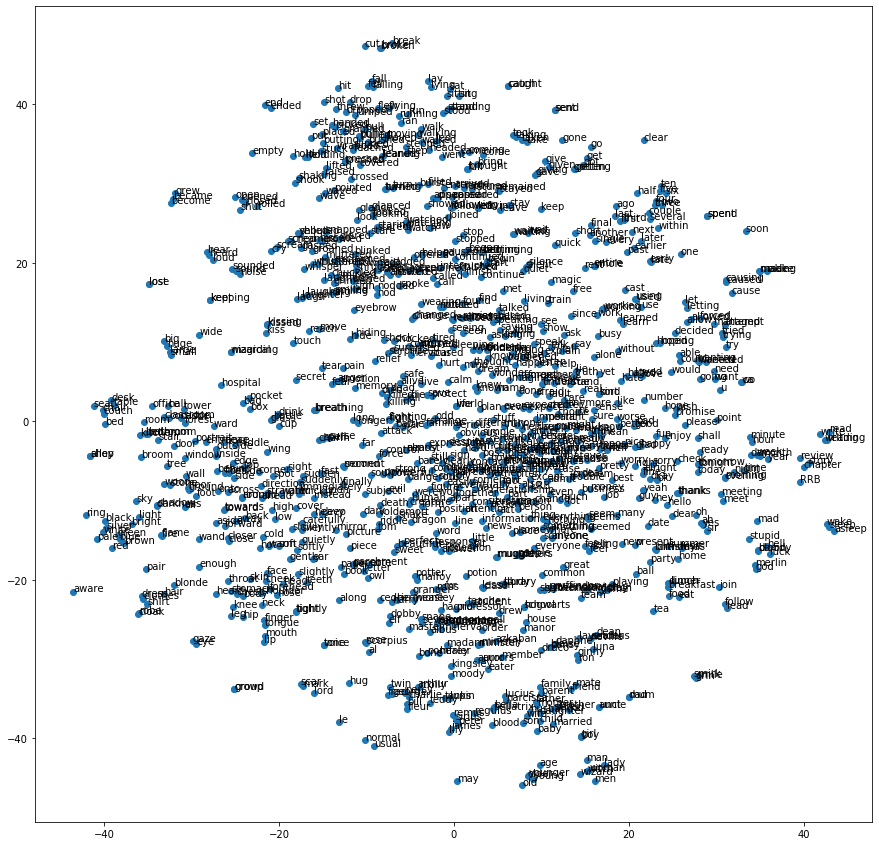

In [61]:
X_embedded = TSNE(n_components=2).fit_transform(most_common_embs)

plt.figure(figsize=(15, 15))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
for i, word in enumerate(most_common_words):
    plt.annotate(word, (X_embedded[i][0], X_embedded[i][1]))
plt.show()

## Часть 3. [5 баллов] Классификация текстов
Задача классификации формулируется так: данный фрагмент фанфика описывают какую-то ситуацию, которая предшествует заклинанию. Требуется по тексту предсказать, какое именно заклинание будет произнесено. Таким образом, заклинание - это фактически метка класса. Основная мера качества – macro $F_1$.
Обучите несколько классификаторов и сравните их между собой. Оцените качество классификаторов на частых и редких классах. Какие классы чаще всего оказываются перепутаны? Связаны ли ошибки со смыслом заклинаний?

1. [1 балл] Используйте fastText в качестве baseline-классификатора.
2. [2 балла] Используйте сверточные сети в качестве более продвинутого классификатора. Поэкспериментируйте с количеством и размерностью фильтров, используйте разные размеры окон, попробуйте использовать $k$-max pooling. 
3. [2 балла] Попробуйте расширить обучающее множество за счет аугментации данных. Если вам понадобится словарь синонимов, можно использовать WordNet (ниже вы найдете примеры).
[бонус] Используйте результат max pooling'а как эмбеддинг входного текста. Визуализируйте эмбеддинги 500-1000 предложений из обучающего множества и изучите свойства получившегося пространства.
[бонус] Используйте ваш любимый классификатор и любые (честные) способы повышения качества классификации и получите macro $F_1$ больше 0.5.

## Часть 4. [1 балл] Итоги
Напишите краткое резюме проделанной работы. Читали ли вы сами Гарри Поттера или фанфики о нем и помогло ли вам знание предметной области в выполнении домашнего задания?

### Данные
Сырые тексты 

In [ ]:
!unzip hpac_source

In [ ]:
!ls hpac_source | wc -l

In [ ]:
!unzip hpac_splits

train, test, dev файлы

In [ ]:
import pandas as pd
df = pd.read_csv('hpac_splits/hpac_training_128.tsv', sep = '\t', header = None)

In [ ]:
df.head()

In [ ]:
df.iloc[0][1], df.iloc[0][2]

### Как использовать WordNet из nltk?

In [ ]:
# скачиваем WordNet
import nltk
nltk.download('wordnet')

In [ ]:
# слово -> множество синсетов (синонимов разных смыслов исходного слова)
from nltk.corpus import wordnet as wn
wn.synsets('magic')

In [ ]:
# посмотрим, что внутри одного синсета
wn.synsets('magic')[1].lemmas()[0]

In [ ]:
# возьмем лемму одного из слов из синсета
wn.synsets('magic')[1].lemmas()[-1].name()